<a href="https://colab.research.google.com/github/ykkimhgu/DLIP-src/blob/main/Tutorial_Pytorch/Tutorial_PyTorch_T3_1_Inference_using_Pre_trained_Model_(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DLIP Tutorial - PyTorch**
# Inference using pre-trained model (classification) - Part 1

Y.-K. Kim
(updated 2022. 5. 10) 

===================

- **Part1: inference using pre-trained model**

 : classification given images by famous CNN models.
 
 　The models were pre-trained on the **ImageNet** dataset (1000 classes)


- Part2: Transfer Learning using Pre-trained Models (Classification)



# Load pre-trained model

let’s import models from torchvision module and see what are the different models and architectures available with us. (see: https://pytorch.org/vision/stable/models.html)

In [ ]:
from torchvision import models
import torch

dir(models)

['AlexNet',
 'ConvNeXt',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 'VisionTransformer',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'convnext',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 '

Notice that there is one entry called AlexNet and one called alexnet. The capitalised name refers to the Python class (AlexNet) whereas alexnet is a convenience function that returns the model instantiated from the AlexNet class. It’s also possible for these convenience functions to have different parameter sets. For example, densenet121, densenet161, densenet169, densenet201, all are instances of DenseNet class but with a different number of layers – 121,161,169 and 201, respectively.

In [ ]:
model = models.vgg16(pretrained=True)
model.eval() # run the model with evaluation mode

from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

# Test image preparation

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

In [ ]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In this tutorial, we load a test image from a URL

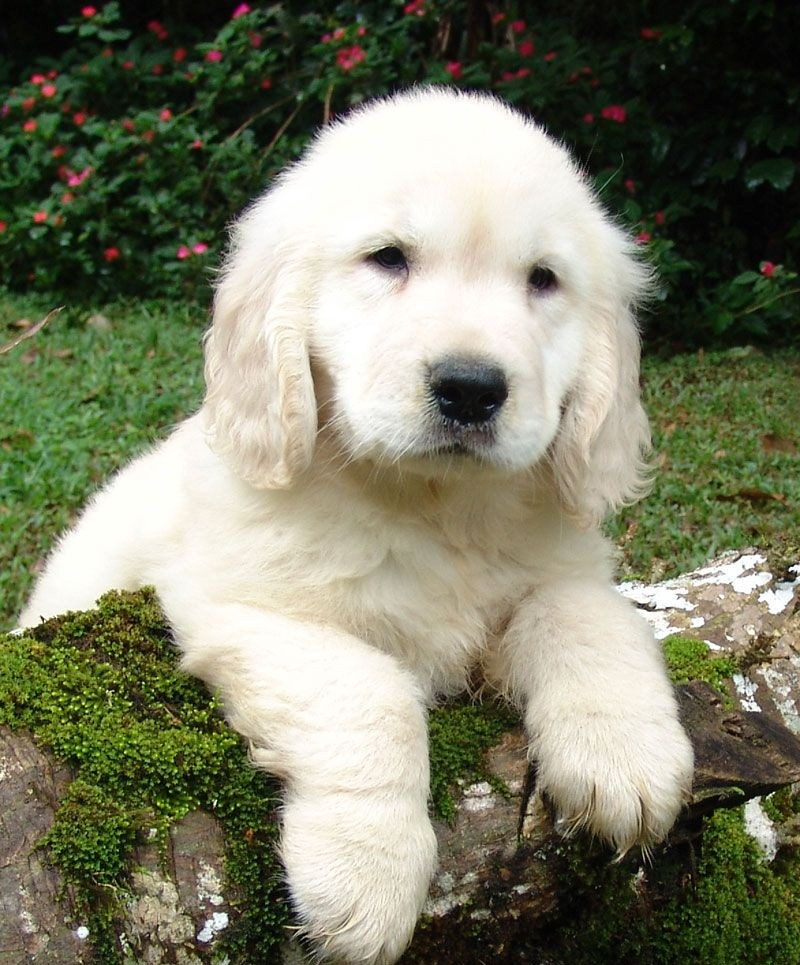

In [ ]:
# Download an example image from URL
url = "https://3.bp.blogspot.com/-W__wiaHUjwI/Vt3Grd8df0I/AAAAAAAAA78/7xqUNj8ujtY/s1600/image02.png"
filename = "test_image.jpg"

import urllib
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

# image show
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread(filename)
cv2_imshow(img)

# Inference using pretrained model

Here's a sample execution. 

The output is the probability value for a total of 1000 classes. (the sum of all probabilities is 1)

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
# print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([5.0251e-08, 3.4781e-10, 6.1058e-09, 1.2522e-09, 6.8390e-10, 5.3823e-09,
        1.2738e-09, 2.5664e-09, 1.9598e-08, 1.6605e-09, 7.5646e-10, 3.7099e-09,
        6.5683e-10, 1.0530e-09, 3.1797e-09, 5.9260e-10, 1.7970e-10, 2.5850e-09,
        4.8483e-09, 2.8321e-09, 2.3656e-09, 2.1623e-09, 2.7113e-08, 6.9996e-09,
        5.5082e-08, 5.6033e-09, 5.4523e-10, 1.0129e-09, 1.2682e-08, 2.8725e-10,
        1.4889e-09, 7.6485e-09, 5.6379e-09, 4.8632e-09, 3.4228e-09, 6.5505e-09,
        3.0983e-08, 1.0771e-08, 1.2088e-10, 8.2438e-10, 7.6048e-10, 2.9076e-10,
        2.4909e-10, 4.7838e-10, 1.3443e-10, 5.7489e-09, 7.4731e-10, 1.7893e-10,
        5.1189e-09, 1.2109e-09, 9.1331e-09, 6.4784e-09, 4.3160e-09, 3.9905e-09,
        8.0421e-10, 1.5955e-08, 1.4429e-09, 1.2241e-09, 8.5322e-10, 5.6527e-09,
        2.3494e-08, 2.2551e-09, 1.5439e-08, 4.0784e-09, 9.2953e-09, 2.0874e-08,
        1.8943e-09, 6.1786e-09, 1.6199e-09, 3.9081e-09, 2.2271e-09, 3.5694e-09,
        2.9279e-08, 5.6661e-09, 1.0213e-

This is all good but what do we do with this output vector out with 1000 elements? We still haven’t got the class (or label) of the image. For this, we will first read and store the labels from a text file having a list of all the 1000 labels. Note that the line number specified the class number, so it’s very important to make sure that you don’t change that order.

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-05-10 04:13:54--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.1’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-05-10 04:13:54 (97.0 MB/s) - ‘imagenet_classes.txt.1’ saved [10472/10472]



Now, we need to find out the index where the maximum score in output vector out occurs. We will use this index to find out the prediction.

In [ ]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

golden retriever 0.674384355545044
kuvasz 0.15584352612495422
Great Pyrenees 0.09373168647289276
cocker spaniel 0.022020941600203514
Tibetan mastiff 0.013417464680969715
